# Introduction to Seaborn

`Seaborn` is a plotting library which is built on top of `Matplotlib`, however it is specifically designed for data analysis. It is integrated with `Pandas` and provides routines for common tasks for exploratory data analysis. `Matplotlib` functions calls can also be used to enhance the `Seaborn` plots.

`Seaborn` has high level and low level routines, we will concentrate on the high level routines.

`Seaborn` also has some builtin datasets, which we will discuss and use to display the plotting routines. The names of these datasets can be obtained using `sns.get_dataset_names()`. To load and individual dataset and store as a `pandas` dataframe, use `sns.load_dataset()`.

## Contents

* Categorical plots
* Scatter plots and relations between features
* Line plots
* Exercises

Import libraries, the common abbreviations for `seaborn` is `sns` or sometimes `sb`. We will use `sns` here.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In general `seaborn` routines have the syntax

> sns.plottype(data, x=x, y=y, ...)

`data` corresponds to the particular dataframe, `x` is the feature to be plotted on the x-axis, and `y` is the feature to be plotted on the y-axis. One of the most common other keywords is `hue`, which allows the plotted features to be categorised in terms of the other features of the dataframe.

## Categorical plots

The first dataset we will use is the `titanic` dataset. This contains details about each of the individual passengers on the Titanic, including whether or not they survived.

In [8]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


The dataset has 891 records and 15 features for each record.

In [9]:
titanic.shape

(891, 15)

To create a bar plot which counts the number of passengers in a particular category, we can use `sns.countplot()`. This only takes one of the `x` and `y` arguments. In the first case the bar plots will be vertical, and in the second case they will be horizontal. In this case we want to count passengers based on the port that they embarked at and the class they travelled in, so we can set `hue='class'`. We also set the order of the ports, so that they are listed in the order visited. If not, it will be ordered in terms of decreasing count.

Notice that `seaborn` creates axis titles and legends automatically. We can add a figure title using `plt.title()`.

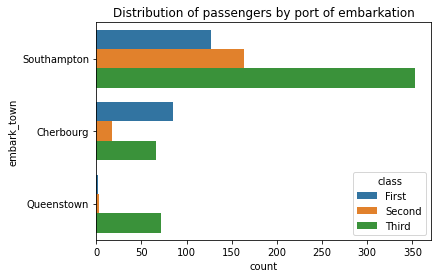

In [10]:
sns.countplot(data=titanic, y='embark_town', hue='class', order=('Southampton','Cherbourg','Queenstown'))
plt.title('Distribution of passengers by port of embarkation');

Text(0.5, 1.0, 'Distribution of embarked passengers by alive of passengers')

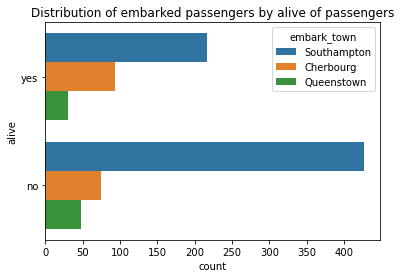

In [11]:
sns.countplot(data=titanic, y='alive', hue='embark_town', order=('yes','no'))
plt.title('Distribution of embarked passengers by alive of passengers')

Text(0.5, 1.0, 'Distribution of class passengers by alive of passengers')

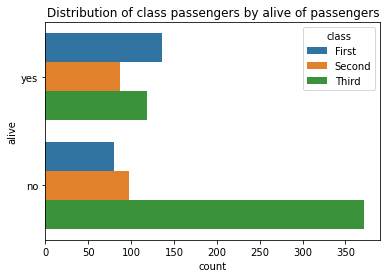

In [12]:
sns.countplot(data=titanic, y='alive', hue='class', order=('yes','no'))
plt.title('Distribution of class passengers by alive of passengers')

Text(0.5, 1.0, 'Distribution of passengers class by sex of passengers')

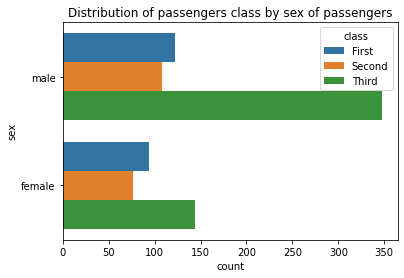

In [13]:
sns.countplot(data=titanic, y='sex', hue='class', order=('male','female'))
plt.title('Distribution of passengers class by sex of passengers')

The function `sns.barplot()` allows categorical data to be plotted against continuous data. If we want to determine the average fare paid by adult males and females, and children, again categorized on the class that they travelled in, we can plot `who` and `class` (categorical variables) against `fare` (a continuous variable). This plots a rectangle whose height is the mean value, and error bars which show the 95% confidence interval for the observations (95% of the observations lie in this interval).

If we wanted the bar plot to have horizontal bars, we could set `x='fare'` and `y='who'`.

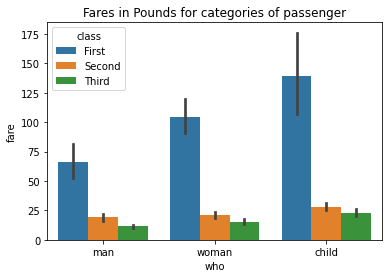

In [14]:
sns.barplot(data=titanic, x='who', y='fare', hue='class')#the fare is mean 
plt.title('Fares in Pounds for categories of passenger');

Histograms of data can be created using the routine `sns.histplot()`. By default `sns.histplot()` plots counts,  however by specifying keywords for`sns.histplot()` we can also plot distributions. Here we will primarily plot counts of features.

Histograms are used to bin continous data into a discrete number of groups, and then count the number of observations in each group. If we want to plot the count of passengers based on `age` and `class`, we then just need to set `x='age'` and `hue='class'`. As we have multiple categories (classes) in each bin, we need to specify that they are stacked one on top of each other using `multiple='stack'`. Otherwise, the bins for each category will be overlaid and some will not be observable.

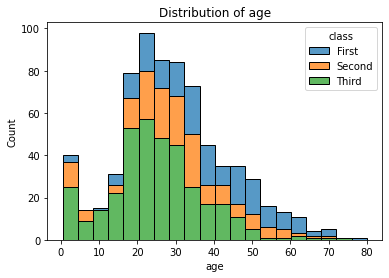

In [15]:
sns.histplot(data=titanic, x='age', hue='class', multiple='stack')
plt.title("Distribution of age");

<AxesSubplot:xlabel='age', ylabel='Count'>

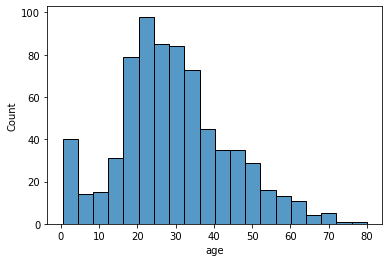

In [16]:
sns.histplot(data=titanic,x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

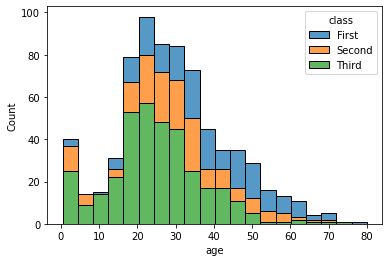

In [17]:
sns.histplot(data= titanic, x='age',hue='class',multiple='stack')

<AxesSubplot:xlabel='age', ylabel='Density'>

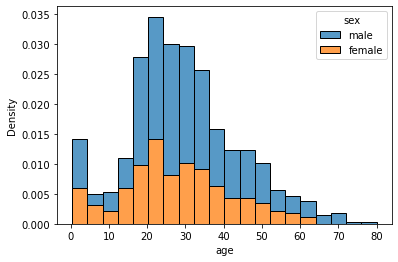

In [18]:
sns.histplot(data= titanic, x='age',hue='sex',multiple='stack',stat='density')

<AxesSubplot:xlabel='fare', ylabel='Count'>

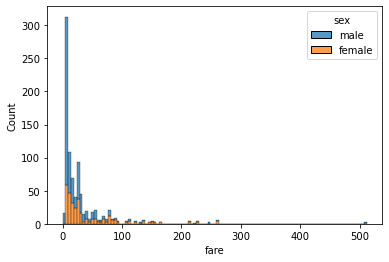

In [19]:
sns.histplot(data=titanic, x='fare',hue='sex',multiple='stack')

To create a distribution, where the area of the histogram is normalized to be equal to one, we can set `stat='density'`. This will create a plot similar to the default for `sns.displot()`, and for which the height of the bars do not change significantly as we change the number of bins. 

Investigate changing the number of bins for the histogram and density plots by varying the keyword `bins=n`, where `n` is an integer.

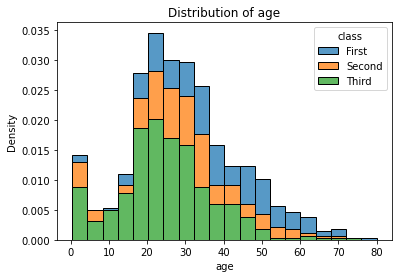

In [20]:
sns.histplot(data=titanic, x='age', hue='class', multiple='stack', stat='density')
plt.title("Distribution of age");

An alternative to stacked plots is to plot categories next to each other using `multiple='dodge'`. In this case to make the figures easier to view we slightly shrink the bars and reduce the number of bins by setting `shrink=0.8` and `bins=10`. Notice that reducing the number of bins changes the shape of the histogram.

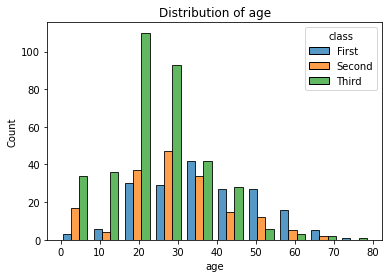

In [21]:
sns.histplot(data=titanic, x='age', hue='class', bins=10, multiple='dodge', shrink=0.8)
plt.title("Distribution of age");

<AxesSubplot:xlabel='age', ylabel='Count'>

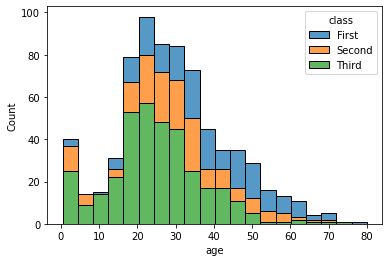

In [22]:
sns.histplot(data=titanic,x='age',hue='class',multiple='stack')

<AxesSubplot:xlabel='age', ylabel='Count'>

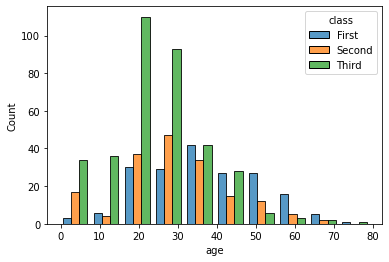

In [23]:
sns.histplot(data=titanic,x='age',hue='class',bins=10, multiple='dodge',shrink=0.8)

As with the other bar type plots we have considered, the orientation of the plots can be changed by setting the binned variable to `y` rather than `x`.

We can also create two-dimensional histograms by setting both the `x` and `y` continuous variables. The colour of each bin then corresponds to the frequency of observations. To understand the count in each bin, a colourbar should be added to the plot. In this case the darker cells reflect higher counts.

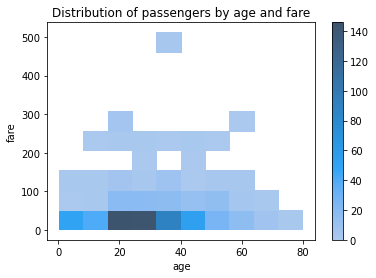

In [24]:
sns.histplot(data=titanic, x='age', y='fare', bins=10, cbar=True, palette='viridis')
plt.title("Distribution of passengers by age and fare");

Sometimes we need to know the cumulative count of a feature. For example, we might want to know the number of passengers less than a certain age. In this case we can create cumulative histrograms by setting `cumulative=True`. To show the count of passengers by sex, less than a certain age we can therefore use.

Text(0.5, 1.0, 'Cumulative count of passengers')

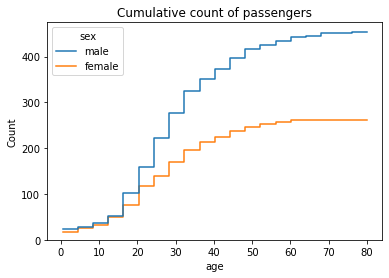

In [25]:
sns.histplot(data=titanic, x="age", hue="sex", element="step", fill=False, cumulative=True);
plt.title('Cumulative count of passengers')

For multiple categories these plots can also be stacked. If we plot the cumulative density, it is then apparent that the height of the plot approaches one at the right hand side, reflecting that for density plots the area of the histogram is one.

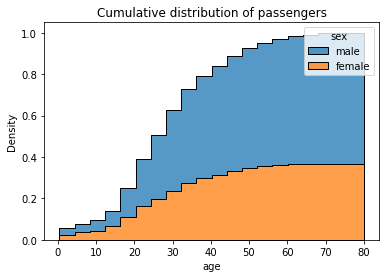

In [26]:
sns.histplot(data=titanic, x="age", hue="sex", element="step", multiple='stack', stat='density',
             cumulative=True);
plt.title('Cumulative distribution of passengers');

We saw that bar plots can show the mean and variation of observations. If we want more detail there are four `seaborn` plot types we can use to investigate the observations. The first two are `sns.swarmplot()` and `sns.stripplot()`, which plot the actual observations, and the second two are `sns.boxplot()` and `sns.violinplot()`, which plot descriptive statistics. 

To demonstrate these plots we will investigate the survival rate of passengers. 

`sns.swarmplot()` plots each observation at a particular level, without superimposing any observations. Therefore the width of the swarm at each level demonstrates the number of observations for that pairing of categories. Depending on the number of observations the size of the marker may need to be adjusted to fit all the data on one plot. Here `size=3` gives a satisfactory visualisation of the data. With multiple categories for `hue`, the plots can be overlaid or plotted side-by-side by setting `dodge=True`. 

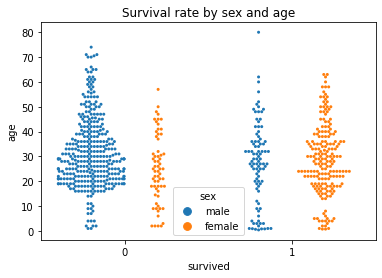

In [27]:
sns.swarmplot(data=titanic, x="survived", y="age", hue='sex', dodge=True, size=3)
plt.title('Survival rate by sex and age');

`sns.stripplot()` shows a similar visualisation of the data, but the data points are overlaid in a strip of fixed width. Therefore the density of points reflects the number of observations.

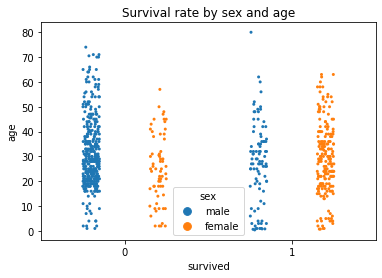

In [28]:
sns.stripplot(data=titanic, x="survived", y="age", hue='sex', dodge=True, size=3)
plt.title('Survival rate by sex and age');

Box and whisker plots can be created using `sns.boxplot()`. These can be thought of continuous versions of the strip plots. The filled box for each classification shows the quartiles for the data, i.e., the levels which account for 25%, 50% and 75% of the observations. The whiskers at the top and bottom of the plots then show what `seaborn` determines to be the upper and lower limits of the data. Any observations which are outside these limits are classied as 'outliers' and are show a separate points. 

Using a box and whisker plot, the following cell shows the descriptive statistics for survival rates as a function of `age` and `class`.

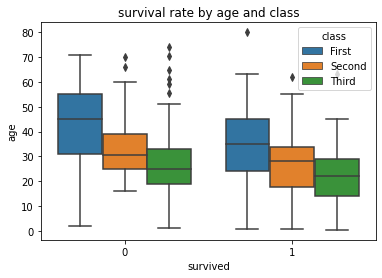

In [29]:
sns.boxplot(data=titanic, x="survived", y="age", hue="class")
plt.title('survival rate by age and class');

Violin plots can be considered as continuous analogues of the swarm plots. In these plots `seaborn` fits a continuous curve to the distribution of the observations and plots this curve. One very useful property of violin plots is that if we are classifying observations based on a binary variable such as `survived` or `sex`, then the violin plot can be split to show the distributions for the two values on either side of the plot. Otherwise, the plot will be symmetrical. 

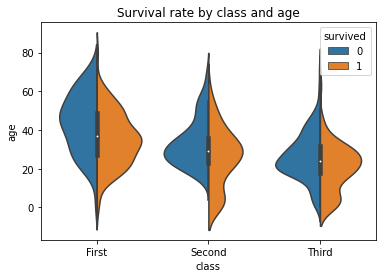

In [30]:
sns.violinplot(x='class', y='age', hue='survived', data=titanic, split=True)
plt.title('Survival rate by class and age');

## Scatter plots and relations between features

Scatter plots are useful for observing data with multiple continuous features. For the titanic dataset the only continuous feature is the age, so to demonstrate scatter plots we will use the penguins dataset. This dataset classify three types of penguin species in the Southern Atlantic Ocean, based on four continuously varying features. 

As can be seen there are rows in the data which have missing entries, which are represented by NaN (not a number). Our first step should be to remove these rows, however `seaborn` takes these into account when plotting the data, so we can analyse the data without first cleaning.

In [31]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


The dataset has 344 observations, each having 7 features.

In [32]:
penguins.shape

(344, 7)

We can now use `sns.scatterplot()` to try to understand the classifications. By setting the size of the dots proportional to one of the features (here we choose 'body_mass_g') we can observe the classifications as three of the features are varied. Now it can be observed that Adelie penguins have distinctly different bill lengths from the other two species, while Gentoo penguins have distincly different flipper lengths. However, beware of including too much information in your plots.

Text(0.5, 1.0, 'Variation of penguin species')

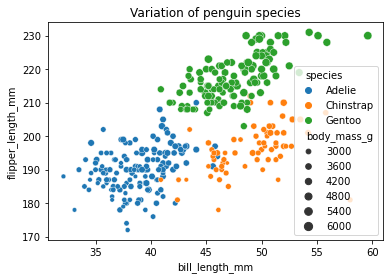

In [33]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='species', size='body_mass_g')
plt.title('Variation of penguin species')

One way to enhance the scatterplots is to include the distributions of the features. Recall that these are continuous versions of histograms. The function `sns.jointplot()` creates such a figure. On the top axis the distributions of the `x` variable are shown, and on the right axis the distributions of the `y` variable are shown. 

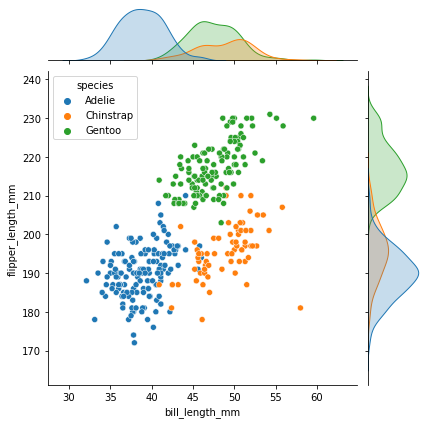

In [34]:
sns.jointplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='species');

`sns.pairplot()` will create these types of plots for all the numerical features of the dataset. In this case only the dataframe needs to be passed as an argument. Beware that if you have a large number of features, this can take a while to generate the figure. The plots on the main diagonal of this figure show the distribution for the features, while the plots off the main diagonal show the scatter plot for two particular features. Note that the plot on row 1 and column 2 is the same as that on row 2 and column 1, except that it is reflected in the line y=x. The same applies to all the scatter plots.

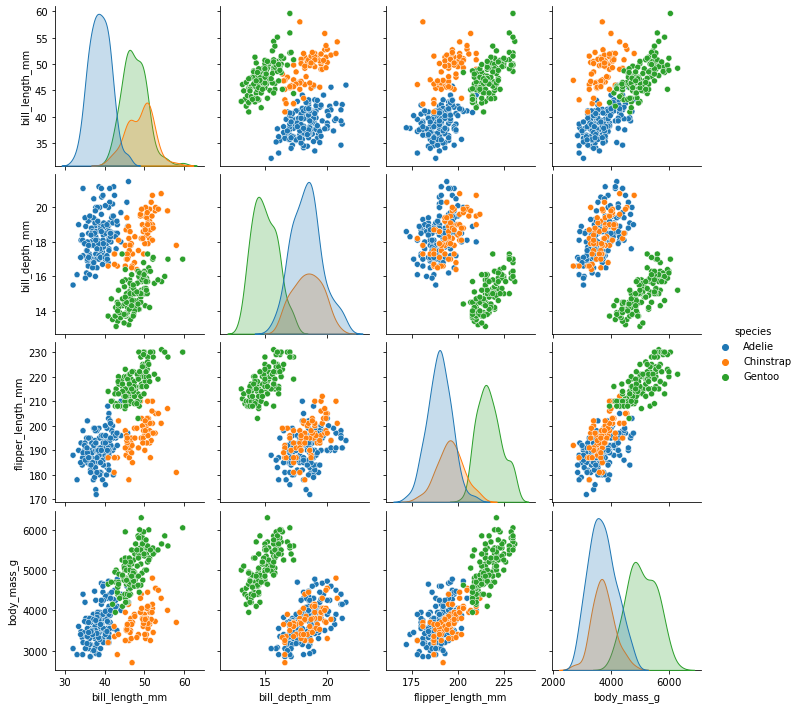

In [35]:
sns.pairplot(data=penguins, hue='species');

We can now use `seaborn` to plot the line of best fit through a particular scatterplot. This process is known as 'linear regression' and can be created with the function `sns.regplot()`. By default `seaborn` shows the line of best fit as a solid line and shows the confidence interval for the line as a shaded region on either side of the solid line. The confidence interval occurs due to the line of best fit being calculated using random sampling of the dataset. 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

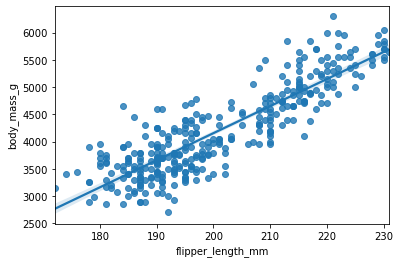

In [36]:
sns.regplot(data=penguins, x='flipper_length_mm', y='body_mass_g')

For the flipper length and body mass the line of best fit reasonably well describes the relation between the two features. The features are therefore said to have a 'high correlation'. The correlation between two features can vary between -1 and 1. If the correlation is close to 1, then there is an approximately linear relation between the two features and as one increases the other also increases. If the correlation is close to -1, again there is an approximately linear relation between the two features, but as one increases the other decreases. If the correlation is close to 0 there is no linear relation between the two features. 

Measuring the correlation between continuous variables is an important part of exploratory data analysis. For any dataframe this can be calculated using the method `df.corr()`. The correlations can then be plotted using `sns.heatmap()`, which allows us to quickly observe the relations between features. Note that the correlation table is symmetric and the correlations on the main diagonal must be 1, so we could just plot the table below the main diagonal. By setting `annot=True`, we can also include the values of the correlation on the table.

Here we see there is a high correlation between flipper length and body mass, as expected. The lowest absolute value of the correlation is between bill depth and bill length. You should compare the correlations with the corresponding plots in the pair plot above.

Text(0.5, 1.0, 'Correlations of penguin features')

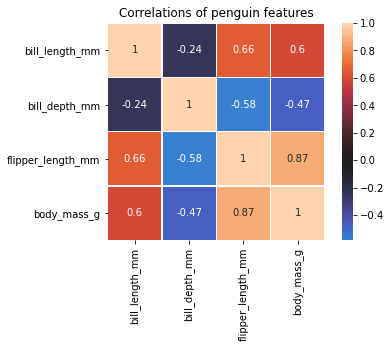

In [37]:
corr = penguins.corr()
sns.heatmap(corr, annot=True, center=0, square=True, linewidths=.5);
plt.title('Correlations of penguin features')

## Line plots

The final plotting feature of `seaborn` that we will discuss here are lineplots. To investigate this we will use the flight dataset of `seaborn`, which is an artificial dataset which shows passengers per month over the period 1949 to 1960. 

In [38]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


This has 144 observations, with three features for each observation.

In [39]:
flights.shape

(144, 3)

It is more useful to view this as a 'pivot table', where the rows are the year, the columns are the months, and the entries are the number of passengers.

In [40]:
flights_wide = flights.pivot('year','month','passengers')
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


To first illustrate line plots, we will create a series which is the sum of all the columns of `flights_wide` for each row. This shows the annual number of passengers.

In [41]:
flights_year = flights_wide.sum(axis=1)#if axis =0
flights_year

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

Line plots can be created using `sns.lineplot()`. If `x` values are not repeated, then this will plot a single curve. For a series, we only need to specify the name of the series and this will plot the variable against the index.

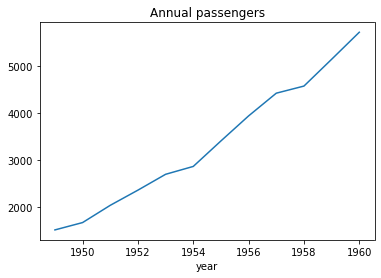

In [42]:
sns.lineplot(data=flights_year)
plt.title('Annual passengers');

For a dataframe we also need to specify which is the `x` variable, and which is the `y` variable. If the `x` variable has repeated values, as for `flights`,  this will plot the mean `y` values for each `x` value and the confidence interval or spread for each of the `y` values. We can therefore view the monthly number of passengers for each year in the following cell. The spread shows the variation over each year.

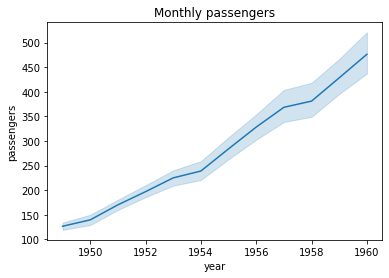

In [43]:
sns.lineplot(data=flights, x='year', y='passengers')
plt.title('Monthly passengers');

Whereas, the following cells shows the monthly number of passengers for each month, and the spread shows the variation for each month over the recorded years.

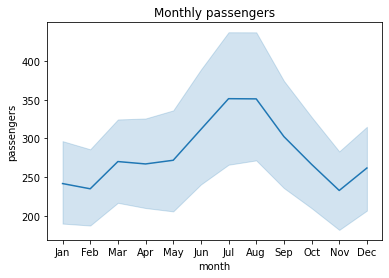

In [44]:
sns.lineplot(data=flights, x='month', y='passengers')
plt.title('Monthly passengers');

These two plots can be combined into a single figure by plotting the monthly passengers against year as the `x` variable and month as the `hue`.

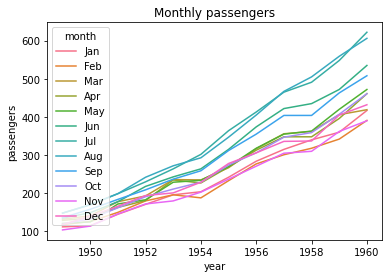

In [45]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month');
plt.title('Monthly passengers');

## Exercises

Note that all of the exercises use `mpg` dataset included in `Seaborn`. You will need to load this data before attempting them.

### Exercise 1

Determine which region, on average, produced the most fuel efficient cars between the years 1970 and 1980. Hint: You will need to filter then plot the data. Several kinds of plots would be reasonable. After interpretting your plot, enter the region name as text. 

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
cars=sns.load_dataset('mpg')

cars[(cars.model_year<=80)&(cars.model_year<=80)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs
335,35.0,4,122.0,88.0,2500,15.1,80,europe,triumph tr7 coupe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra


In [94]:
cars.origin.unique()# check all the element in the origin

array(['usa', 'japan', 'europe'], dtype=object)

In [95]:
cars.model_year[cars.model_year<=80].describe()# check whether fliter data is between 70 and 80

count    338.000000
mean      75.032544
std        3.115312
min       70.000000
25%       72.250000
50%       75.000000
75%       78.000000
max       80.000000
Name: model_year, dtype: float64

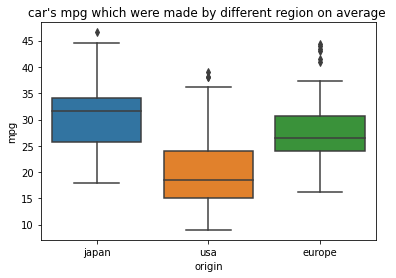

In [96]:
sns.boxplot(data=cars,x='origin',y="mpg",order=('japan','usa','europe'))
plt.title("car's mpg which were made by different region on average ");

In [98]:
cars.acceleration.describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [99]:
cars.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [100]:
#Japan produced the most fuel efficient car on average.

### Exercise 2

Was the region you chose always producing the most fuel efficient cars? Using one line plot, show the change in vehicle mpg over the 10 year period 1970-1980, for each region. Which years was the top region overall (from Ex.1) falling behind? (you can "eyeball" this from the plot). After interpretting your plot, enter the years as text.

Text(0.5, 1.0, 'The mpg value of different regions from 1970 to 1980')

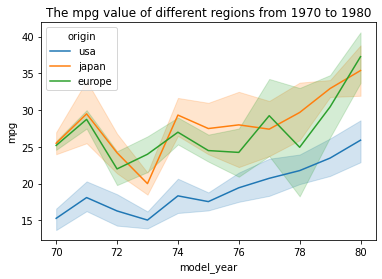

In [101]:
import seaborn as sns
sns.lineplot(data=cars[cars.model_year<=80], x='model_year', y='mpg', hue='origin');
plt.title('The mpg value of different regions from 1970 to 1980')

In [54]:
#Japan was not always producing the most fuel effcient car, in some years(1973,1977)

### Exercise 3

Plot the relationship between horsepower and the acceleration for all of the cars in the dataset and color the points by cylinder number. Note that the acceleration variable corresponds to the time in seconds to accelerate from 0 to 60 mph. Change the default color map to a color map of your choice (see the documentation for how to do this). Interpret the plot, i.e, what relationships does it show? After plotting, enter your interpretation as text.

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

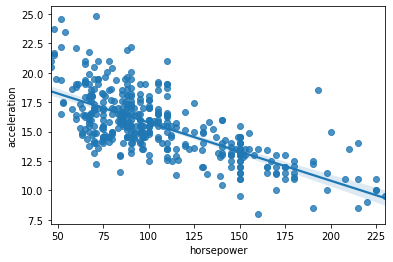

In [103]:
sns.regplot(data=cars, x='horsepower', y='acceleration')

Text(0.5, 1.0, 'Relation between horsepower and acceleration')

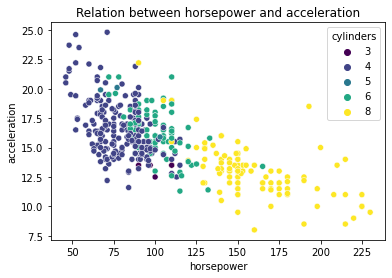

In [107]:
sns.scatterplot(data=cars, x='horsepower', y='acceleration', hue='cylinders',palette = "viridis")
plt.title('Relation between horsepower and acceleration')

In [58]:
#From the above graphs,the relationship between horsepower and the acceleration by cylinder number is negative, the car with higher horsepower are likely to have lower acceleration and vice versa.The cars with higher cylinder numbers are likely to have lower acceleration.

### Exercise 4

For only the continuous variables in the data, plot their relationships using `sns.pairplot`. For the two variables with the strongest relationship (heighest magnitude correlation value), plot a scatter plot with a regression line that summarizes their relationship. After plotting, enter your interpretation as text.

In [108]:
import seaborn as sns
cars=sns.load_dataset('mpg')
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


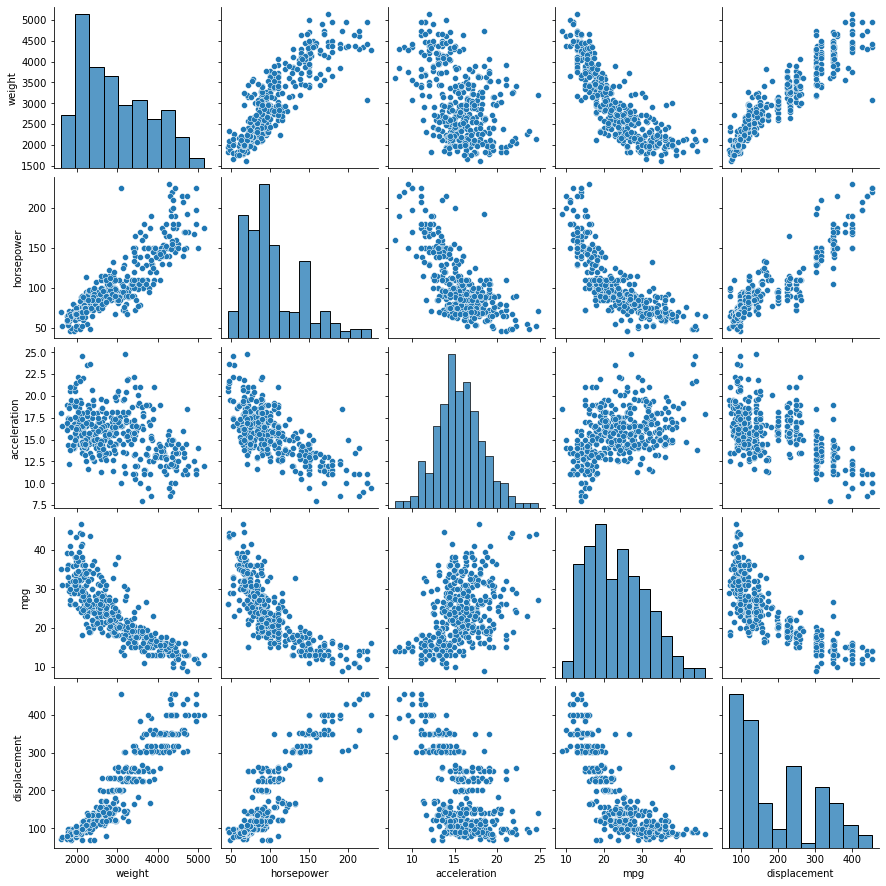

In [110]:
sns.pairplot(cars, vars=['weight','horsepower','acceleration','mpg','displacement'])#These five variables are continuous

In [67]:
max(abs(cars.corr()))

'weight'

In [ ]:
#From the correlation table, weight and displacement has the strongest correlation

<AxesSubplot:xlabel='displacement', ylabel='weight'>

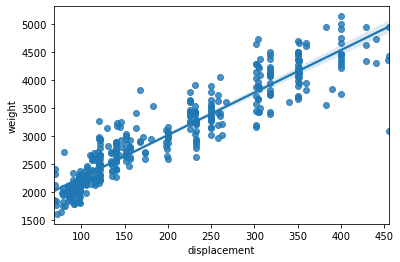

In [112]:
sns.regplot(data=cars,x='displacement',y='weight')

In [ ]:
#Displacement and weight are positive correlated